<a href="https://www.kaggle.com/code/ammanrizwan/crop-yield-regression?scriptVersionId=199053816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/cropyeild/crop_yield.csv')

In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.shape

(19689, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.Season.value_counts().sort_index()

Season
Autumn          414
Kharif         8232
Rabi           5742
Summer         1195
Whole Year     3717
Winter          389
Name: count, dtype: int64

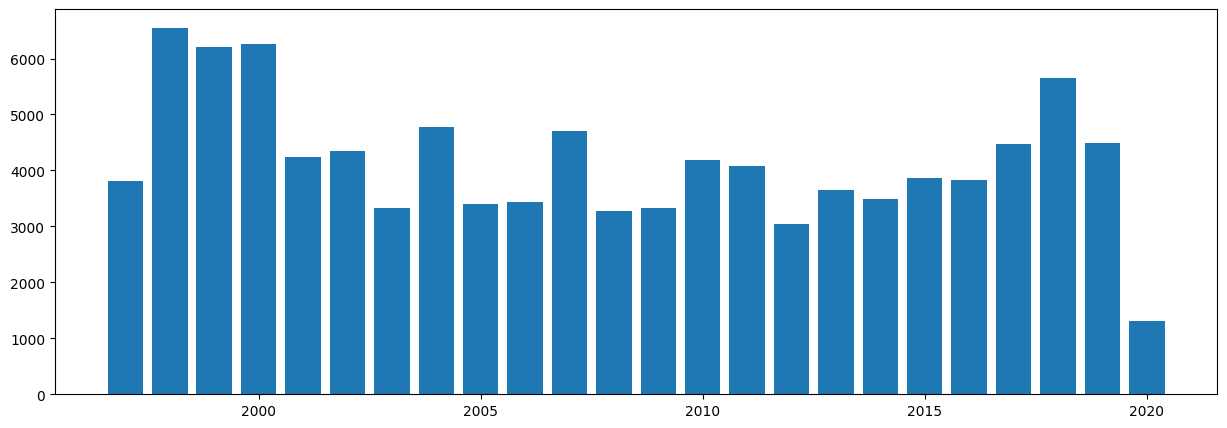

In [7]:
plt.figure(figsize=(15, 5))
# sns.barplot(data=df, x='Crop_Year', y='Annual_Rainfall')
plt.bar(x=df['Crop_Year'], height=df['Annual_Rainfall'])
plt.show()

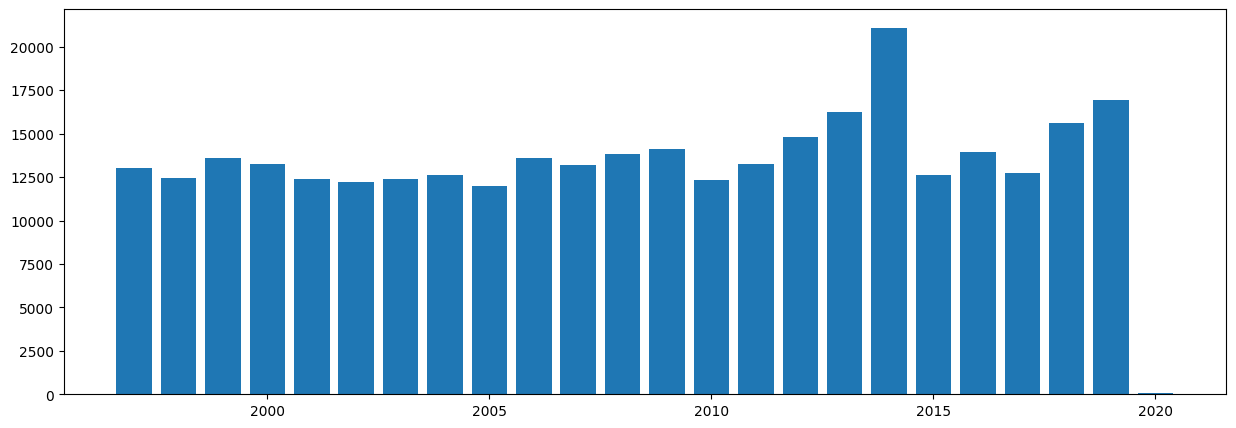

In [8]:
plt.figure(figsize=(15, 5))
# sns.barplot(data=df, x='Crop_Year', y='Yield')
plt.bar(x=df['Crop_Year'], height=df['Yield'])
plt.show()

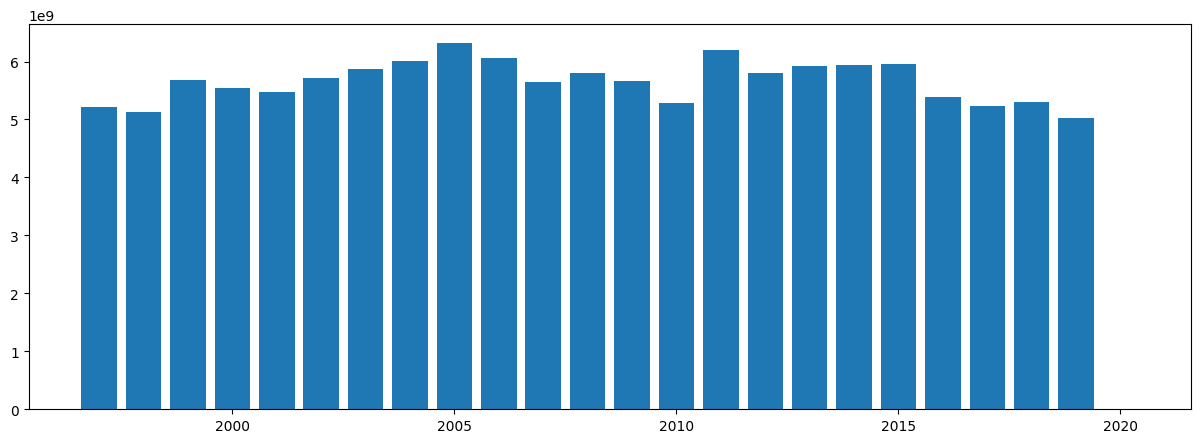

In [9]:
plt.figure(figsize=(15, 5))
# sns.barplot(data=df, x='Crop_Year', y='Production')
plt.bar(x=df['Crop_Year'], height=df['Production'])
plt.show()

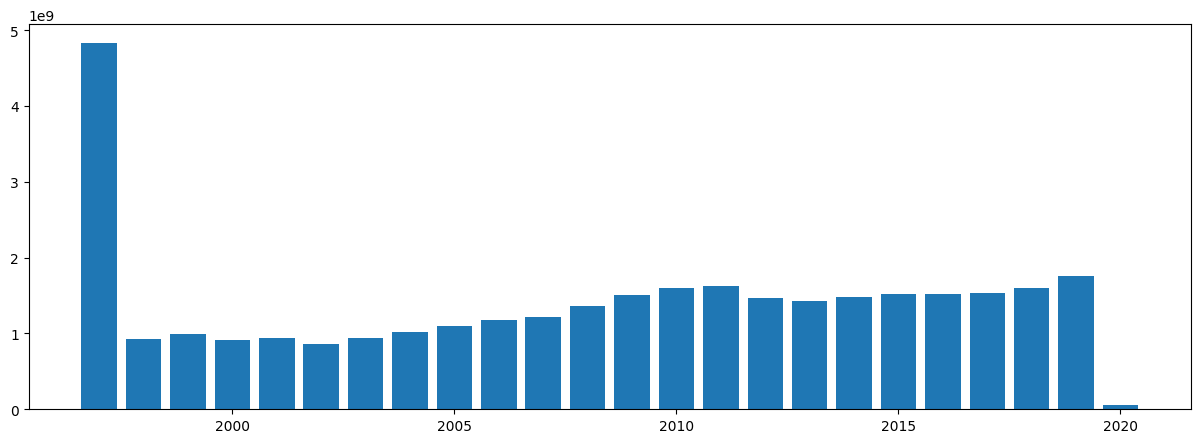

In [10]:
plt.figure(figsize=(15, 5))
# sns.barplot(data=df, x='Crop_Year', y='Fertilizer')
plt.bar(x=df['Crop_Year'], height=df['Fertilizer'])
plt.show()

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix1 = encoder.fit_transform(X[['Season']]).toarray()
        columns = ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
        for i in range(len(matrix1.T)):
            X[columns[i]] = matrix1.T[i]

        return X

In [12]:
class FeatureLabel(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        label = LabelEncoder()
        X['State'] = label.fit_transform(X['State'])

        return X

In [13]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(['Crop', 'Season'], axis=1)

In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('feature_encoder', FeatureEncoder()),
    ('feature_label', FeatureLabel()),
    ('feature_dropper', FeatureDropper())
])

In [15]:
train_data = pipeline.fit_transform(df)

In [16]:
train_data.head(10)

,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
0,1997,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0.0,0.0,0.0,0.0,1.0,0.0
1,1997,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435,0.0,1.0,0.0,0.0,0.0,0.0
2,1997,2,796.0,22,2051.4,75755.32,246.76,0.238333,0.0,1.0,0.0,0.0,0.0,0.0
3,1997,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,0.0,0.0,0.0,0.0,1.0,0.0
4,1997,2,1739.0,794,2051.4,165500.63,539.09,0.420909,0.0,1.0,0.0,0.0,0.0,0.0
5,1997,2,13587.0,9073,2051.4,1293074.79,4211.97,0.643636,0.0,0.0,0.0,0.0,1.0,0.0
6,1997,2,2979.0,1507,2051.4,283511.43,923.49,0.465455,0.0,0.0,1.0,0.0,0.0,0.0
7,1997,2,94520.0,904095,2051.4,8995468.40,29301.20,9.919565,0.0,1.0,0.0,0.0,0.0,0.0
8,1997,2,10098.0,5158,2051.4,961026.66,3130.38,0.461364,0.0,0.0,1.0,0.0,0.0,0.0
9,1997,2,19216.0,14721,2051.4,1828786.72,5956.96,0.615652,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
X = train_data.drop('Yield', axis=1)
y = train_data['Yield']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)
y_scaler = y.to_numpy()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_scaler, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)

LinearRegression()

In [21]:
model_1.score(X_train, y_train)

0.3225712066716494

In [22]:
pred = model_1.predict(X_test)

In [23]:
pred[:10]

array([ 7.35610691e+00,  1.13561069e+01, -8.74708846e+00,  1.06106907e-01,
        1.88561069e+01, -4.64389309e+00,  2.93561069e+01,  7.35610691e+00,
        2.91856107e+02,  2.03561069e+01])

In [24]:
from sklearn.metrics import mean_squared_error

print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, pred)))

Root Mean Square Error: 692.4165608538339


In [25]:
from xgboost import XGBRFRegressor

model_2 = XGBRFRegressor()

model_2.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [26]:
model_2.score(X_train, y_train)

0.9938365822685266

In [27]:
pred_2 = model_2.predict(X_test)

In [28]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_2)))

RMSE: 306.1032274006226


In [29]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, pred_2))

R2 Score: 0.8830572592193536


In [30]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor(n_estimators=200, n_jobs=-1, max_depth=5, max_features=5)

model_3.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=200, n_jobs=-1)

In [31]:
model_3.score(X_train, y_train)

0.948144419916428

In [32]:
pred_3 = model_3.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, pred_3))

R2 Score: 0.879795387115176


In [34]:
from sklearn.metrics import mean_squared_error

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_3)))

RMSE: 310.3429196698005
